# Learning outcomes
- Geometric transformation
    - rotation
    - translation
    - affine transformation
    - perspective transfomation
    
- Some basic drawing functions
    - line
    - circle
    - ellipse
    - rectangle
    - text
    
- Bitwise operation
    - OR
    - XOR
    - AND
    - NOT
    
- Convolution: sliding window performing linear combination.
    - Image smoothing (denoising)
    - Sharpening
    - at the heart of CNN
    - other effects

## Setup


In [2]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *

## Geometric transformation

### Rotation

In [7]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w+tx, h+ty)) 

show_img(f"translation tx: {tx}, ty: {ty}", dst)

### Rotation

In [9]:
# define N: center, angle and scale
yc, xc = h // 2, w // 2

angle = 90 # +ve is anticlockwise

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))

show_img("rotation", dst)

## Custome affine transform

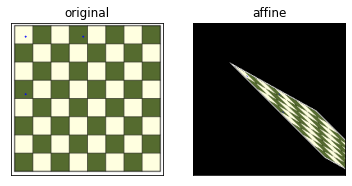

In [13]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

h, w = img.shape[:2]

p0 = np.float32([[20,20], [100,20], [20,100]])
p1 = np.float32([[75,75], [120,100], [125, 125]])

for pt in p0:
    cv.circle(img, (int(pt[0]),int(pt[1])), 1, (0, 0, 255), -1)
    
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img, M, (w, h))

plt.subplot(121), plt_img(img, title = "original")
plt.subplot(122), plt_img(dst, title = "affine")
plt.show()

In [14]:
dst[75, 75, :]

array([  0,   0, 255], dtype=uint8)

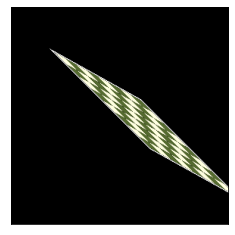

In [15]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

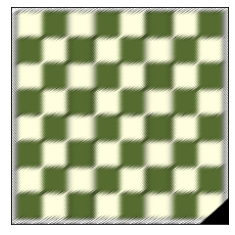

In [19]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restored = cv.warpAffine(dst_new, M_inv, (w,h))

plt_img(ori_restored)

## Perspective transform

In [39]:
img = cv.imread("images/name_card_sample.webp")

show_img("img", img, adjust = True)

In [40]:
# get the 4 points, top left1, right2. bottom right3, left4
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        p.append((x,y))
        cv.circle(img, (x,y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(120, 107)
(766, 47)
(908, 267)
(73, 385)


In [30]:
!pip install scipy

In [32]:
from scipy.spatial.distance import euclidean

In [43]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_arr = np.float32(p)
dst = np.float32([[0,0], [W-1,0], [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp)

## Drawing functions

In [44]:
#line
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [57]:
img_copy = img.copy()

cv.line(img_copy, (30,80), (150,150), (0,0,255), 4, cv.LINE_AA)
show_img("line", img_copy)

In [50]:
#circle
img_copy = img.copy()

cv.circle(img_copy, (145, 50), 40, (0,0,255), 2, cv.LINE_AA)
show_img("circle", img_copy)

In [54]:
#ellipse
img_copy = img.copy()
#axes = (50, 25)
axes = (25, 50)
angle = 0

#cv.ellipse(img_copy, (145,50), axes, angle, 0, 180, (100, 0, 100), 2, cv.LINE_AA)
cv.ellipse(img_copy, (145,50), axes, angle, 0, 360, (100, 0, 100), 2, cv.LINE_AA)
show_img("ellipse", img_copy)

In [58]:
# rectangle
img_copy = img.copy()

cv.rectangle(img_copy, (30,80), (150,150), (0,0,255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

In [59]:
# text
img_copy = img.copy()

cv.putText(img_copy, "I am a happy dog!", (15, 145), cv.FONT_HERSHEY_SIMPLEX, 0.65, (200, 0, 50), 2)
show_img("font", img_copy)

### create a custom drawing board
Trackbar function, mouse callback function.

In [61]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, GREEN, BLUE, CYAN, MAGENTA, YELLOW, WHITE)

#create a trackbar function, mouse callback function, while loop to show template
def nothing(x):
    pass

p0 = p1 = (0, 0)

def mouse (event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos(tr1_name, wn)
        if d==0:
            d==-1
        i = cv.getTrackbarPos(tr2_name, wn)
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow(wn, img)
        
wn = "window"
tr1_name = "thickness"
tr2_name = "color"
img = np.zeros((400, 400, 3), dtype = np.uint8)
cv.namedWindow(wn)
cv.createTrackbar(tr1_name, wn, 0, 10, nothing)
cv.createTrackbar(tr2_name, wn, 0, 6, nothing)
cv.setMouseCallback(wn, mouse)

while(1):
    cv.imshow(wn, img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    if k == ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

## Exercise: Drawing functions

In [87]:
#Bulleye method1
img = np.zeros((400, 400, 3), dtype = np.uint8)

w, h = img.shape[:2]
wc, wh = int(w/2), int(h/2)
center = (wc, wh)
radius = 20
color = (255, 255, 255)
thickness = 2
lineType = cv.LINE_AA

while(radius * 2 < w):
    cv.circle(img, center, radius, color, thickness, lineType)
    wc += 20
    wh += 20
    radius += 20

cv.putText(img, "Bulleye", (20, 375), cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.65, 255, 2)    
show_img("circle", img)

In [88]:
#Bulleye method2
img = np.zeros((400, 400), dtype = np.uint8)

yc, xc = img.shape[0] //2, img.shape[1] //2
radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, xc), r, 255, 2)
    
cv.putText(img, "Bulleye", (20, 375), cv.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.65, 255, 2)

show_img("img", img)

## Bitwise Operation

In [31]:
rect = np.zeros((400, 400), np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [32]:
# AND
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [94]:
# OR
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [95]:
# XOR
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [97]:
res_not = cv.bitwise_not(rect)
show_img("NOT", res_not)

In [98]:
#
img = cv.imread("images/dog.jfif")
h, w = img.shape[:2]

mask = np.zeros((h, w), dtype = np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

res = cv.bitwise_and(img, img, mask = mask)

show_img("res", res)

## Convolution

In [104]:
# identity kernel
img = cv.imread("images/opencv_logo.png")

kernel = np.zeros((3,3))
kernel[1,1] = 1
#print(kernel)

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity", dst)

In [107]:
# sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")

dst = cv.filter2D(img, -1, kernel)

cv.imshow('original', img)
show_img("sharpen", dst)

In [72]:
# blur
kernel = np.ones((5,5)) / 25 #25 is the size of kernel

blur = cv.filter2D(img, -1, kernel)

dst = cv.addWeighted(img, 1.6, blur, -0.6, 0)

show_img("unsharp_masking", dst)

4 functions to perform image blurring:
- `cv.blur`: mean average filter
- `cv.GaussianBlur`: Gaussian filter, suitable for gaussian noise
- `cv.medianFilter`: median filter, useful to eliminate salt and pepper noise
- `cv.bilateralFilter`: edge-preserving filter

## Weekly activity

In [25]:
# Ex1
img = cv.imread("images/flower.jfif")

h, w = img.shape[:2]
center = (w // 2, h // 2)
angle = 45 # +ve is anticlockwise

rotation_matrix = cv.getRotationMatrix2D(center, angle, 1.0)

cos_theta = np.abs(rotation_matrix[0, 0])
sin_theta = np.abs(rotation_matrix[0, 1])
    
new_w = int((h * sin_theta) + (w * cos_theta))
new_h = int((h * cos_theta) + (w * sin_theta))

rotation_matrix[0, 2] += (new_w / 2) - center[0]
rotation_matrix[1, 2] += (new_h / 2) - center[1]
    
dst = cv.warpAffine(img, rotation_matrix, (new_w, new_h))

show_img("rotation", dst)

In [11]:
#!pip install imutils

In [12]:
# Ex1, alternative
import imutils

img = cv.imread("images/lena.jfif")

angle = 45

rotate = imutils.rotate_bound(img, angle)

show_img("rotation", rotate)

In [66]:
# Ex2
bee_img = cv.imread("images/native-bee.png")
flower_img = cv.imread("images/flower.jfif")

rows,cols,channels = flower_img.shape
roi = bee_img[0:rows, 0:cols]

flower_img_gray = cv.cvtColor(flower_img,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(flower_img_gray, 70, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

bee_img_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

flower_img_fg = cv.bitwise_and(flower_img,flower_img,mask = mask)

dst = cv.add(bee_img_bg,flower_img_fg)
bee_img[0:rows, 0:cols ] = dst

show_img("flower_bee",bee_img)

In [67]:
# Ex3
kernel3by3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

kernel5by5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, 25, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1]])


img = cv.imread("images/native-bee.png")
resby3 = img.copy()
resby5 = img.copy()

resby3 = cv.filter2D(resby3, -1, kernel3by3)
resby5 = cv.filter2D(resby5, -1, kernel5by5)

show_img('original', img)
show_img("3x3", resby3)
show_img("5x5", resby5)

#comment: resby5 is sharpened greater than resby3

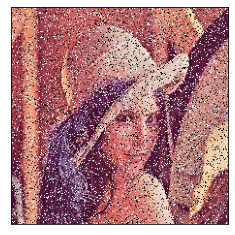

In [85]:
# Ex4
img = cv.imread("images/noise_lena.jpg")

plt_img(cv.cvtColor(img, cv.COLOR_BGR2RGB))

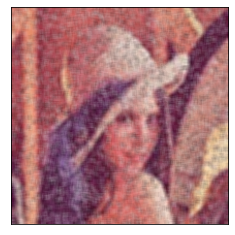

In [86]:
# blur, average filter
kernel = np.ones((5,5)) / 25 #25 is the size of kernel
blur = cv.filter2D(img, -1, kernel)
plt_img(cv.cvtColor(blur, cv.COLOR_BGR2RGB))

# comment:The visibility of noise reduced

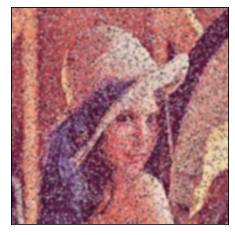

In [83]:
# Gaussian Blurring
blur = cv.GaussianBlur(img, (5,5), 0)
plt_img(cv.cvtColor(blur, cv.COLOR_BGR2RGB))

# comment:The visibility of noise reduced but has high visibility compared to average filter

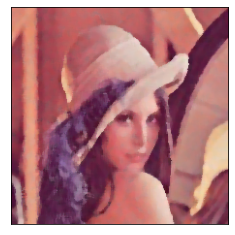

In [84]:
# Median Blurring
median = cv.medianBlur(img,5)
plt_img(cv.cvtColor(median, cv.COLOR_BGR2RGB))

# comment: The person in the image is visible. 
# Deduction: The original image contain salt-and-pepper noise